In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import bs4 as bs
from datetime import datetime
import time

In [2]:
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-01.txt') as file:
    data_aol_1 = [line.strip().split('\t') for line in file.readlines()]
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-02.txt') as file:
    data_aol_2 = [line.strip().split('\t') for line in file.readlines()]
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-03.txt') as file:
    data_aol_3 = [line.strip().split('\t') for line in file.readlines()]
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-04.txt') as file:
    data_aol_4 = [line.strip().split('\t') for line in file.readlines()]
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-05.txt') as file:
    data_aol_5 = [line.strip().split('\t') for line in file.readlines()]

In [3]:
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-06.txt') as file:
    data_aol_6 = [line.strip().split('\t') for line in file.readlines()]
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-07.txt') as file:
    data_aol_7 = [line.strip().split('\t') for line in file.readlines()]
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-08.txt') as file:
    data_aol_8 = [line.strip().split('\t') for line in file.readlines()]
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-09.txt') as file:
    data_aol_9 = [line.strip().split('\t') for line in file.readlines()]
    
    
with open('datasets/AOL-user-ct-collection/user-ct-test-collection-10.txt') as file:
    data_aol_10 = [line.strip().split('\t') for line in file.readlines()]


Применим WordPunctTokenizer для разбиения на слова.

In [4]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

for i in range(1, len(data_aol_1)):
    data_aol_1[i][1] = ' '.join(tokenizer.tokenize(data_aol_1[i][1].lower()))

for i in range(1, len(data_aol_2)):
    data_aol_2[i][1] = ' '.join(tokenizer.tokenize(data_aol_2[i][1].lower()))

for i in range(1, len(data_aol_3)):
    data_aol_3[i][1] = ' '.join(tokenizer.tokenize(data_aol_3[i][1].lower()))

for i in range(1, len(data_aol_4)):
    data_aol_4[i][1] = ' '.join(tokenizer.tokenize(data_aol_4[i][1].lower()))

for i in range(1, len(data_aol_5)):
    data_aol_5[i][1] = ' '.join(tokenizer.tokenize(data_aol_5[i][1].lower()))

for i in range(1, len(data_aol_6)):
    data_aol_6[i][1] = ' '.join(tokenizer.tokenize(data_aol_6[i][1].lower()))

for i in range(1, len(data_aol_7)):
    data_aol_7[i][1] = ' '.join(tokenizer.tokenize(data_aol_7[i][1].lower()))
    
for i in range(1, len(data_aol_8)):
    data_aol_8[i][1] = ' '.join(tokenizer.tokenize(data_aol_8[i][1].lower()))
    
for i in range(1, len(data_aol_9)):
    data_aol_9[i][1] = ' '.join(tokenizer.tokenize(data_aol_9[i][1].lower()))
    
for i in range(1, len(data_aol_10)):
    data_aol_10[i][1] = ' '.join(tokenizer.tokenize(data_aol_10[i][1].lower()))

In [5]:
data_aol_1[:10]

[['AnonID', 'Query', 'QueryTime', 'ItemRank', 'ClickURL'],
 ['142', 'rentdirect . com', '2006-03-01 07:17:12'],
 ['142', 'www . prescriptionfortime . com', '2006-03-12 12:31:06'],
 ['142', 'staple . com', '2006-03-17 21:19:29'],
 ['142', 'staple . com', '2006-03-17 21:19:45'],
 ['142', 'www . newyorklawyersite . com', '2006-03-18 08:02:58'],
 ['142', 'www . newyorklawyersite . com', '2006-03-18 08:03:09'],
 ['142',
  'westchester . gov',
  '2006-03-20 03:55:57',
  '1',
  'http://www.westchestergov.com'],
 ['142', 'space . comhttp', '2006-03-24 20:51:24'],
 ['142', 'dfdf', '2006-03-24 22:23:07']]

In [6]:
data_aol = data_aol_1[1:] + data_aol_2[1:] + data_aol_3[1:] + data_aol_4[1:] + data_aol_5[1:] + data_aol_6[1:] + data_aol_7[1:] + data_aol_8[1:] + data_aol_9[1:]   

In [7]:
data_aol_queries = [query[1] for query in data_aol]

In [8]:
data_aol_queries_test =  [query[1] for query in data_aol_10]

Посмотрим на распределение по кол-ву слов.

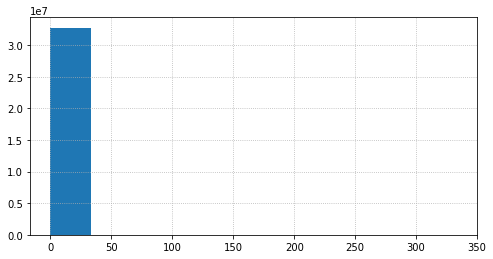

In [9]:
count_words = [len(query.split()) for query in data_aol_queries]
plt.figure(figsize=(8, 4))
plt.hist(count_words)
plt.grid(ls=':')
plt.show()

In [18]:
np.max(count_words), np.min(count_words), np.percentile(count_words, 95), np.percentile(count_words, 99)

(333, 0, 7.0, 9.0)

In [19]:
data_aol[np.argwhere(np.array(count_words) == 0)[0][0]]

['12233161', '', '2006-05-23 21:24:05']

In [10]:
from tqdm import tqdm
from collections import defaultdict, Counter

Считаем насколько часто каждое слово встретилось перед предыдущими (n-1) словами.
В нашем случаем будем рассматривать n = 2 или n = 3. 

К каждому запросу в конец добавим специальный символ EOS. А в 
начало несколько UNK, чтобы проводить подсчет для первых слов запроса.

In [11]:
UNK, EOS = "_UNK_", "_EOS_"

def count_ngrams(lines, n):
    counts = defaultdict(Counter)
    # counts[(word1, word2)][word3] = how many times word3 occured after (word1, word2)

    for line in lines:
        line = (UNK + ' ')* (n - 1) + line + ' ' + EOS
        words = line.split()
        for i in range(n - 1, len(words)):
            counts[tuple(words[i - n + 1: i])][words[i]] += 1
    
    return counts



# N-gram Language Model

Пишем класс для статистической n-граммной языковой модели. 

Она посчитывает вероятности вида $P(word_2 | word_1)$ при n = 2 и $P(word_3 | word_1, word_2)$ при n = 3.

In [12]:
class NGramLanguageModel:    
    def __init__(self, lines, n):
        self.n = n
    
        counts = count_ngrams(lines, self.n)
        
        self.probs = defaultdict(Counter)
        # probs[(word1, word2)][word3] = P(word3 | word1, word2)
        
        for prev_words in counts.keys():
            count_prefix = 0
            for word in counts[prev_words].keys():
                count_prefix += counts[prev_words][word]
            for word in counts[prev_words].keys():
                self.probs[prev_words][word] = counts[prev_words][word] / count_prefix
            
    def get_possible_next_tokens(self, prefix):
        """
        :param prefix: string with space-separated prefix tokens
        :returns: a dictionary {token : it's probability} for all tokens with positive probabilities
        """
        prefix = prefix.split()
        prefix = prefix[max(0, len(prefix) - self.n + 1):]
        prefix = [ UNK ] * (self.n - 1 - len(prefix)) + prefix
        return self.probs[tuple(prefix)]
    
    def get_next_token_prob(self, prefix, next_token):
        """
        :param prefix: string with space-separated prefix tokens
        :param next_token: the next token to predict probability for
        :returns: P(next_token|prefix) a single number, 0 <= P <= 1
        """
        return self.get_possible_next_tokens(prefix).get(next_token, 0)

Строим языковую модель для n = 2.

In [72]:
lm = NGramLanguageModel(data_aol_queries, n=2)

Посмотрим на предсказания нашей модели.

In [74]:
token_probs = lm.get_possible_next_tokens('language')
sorted(token_probs.keys(), key=token_probs.get, reverse=True)

['_EOS_',
 'arts',
 'and',
 'translation',
 'translator',
 'of',
 'development',
 'in',
 'classes',
 'for',
 'learning',
 'schools',
 'pathology',
 'books',
 'javascript',
 'disorder',
 'pathologist',
 'translations',
 'lessons',
 'sample',
 'alphabet',
 'courses',
 '.',
 'is',
 'delays',
 'us',
 'acquisition',
 'lesson',
 'programs',
 'school',
 'examples',
 'dictionary',
 'learners',
 'used',
 'interpreter',
 'institute',
 'newspapers',
 'requirements',
 'center',
 'tools',
 'converter',
 'don',
 'instruction',
 'translators',
 'to',
 'pragmatics',
 'being',
 'pathologists',
 'program',
 'software',
 'association',
 'class',
 'disorders',
 'graphic',
 'that',
 'assessment',
 'en',
 'master',
 'easier',
 'trivia',
 'therapist',
 '-',
 'academy',
 'speech',
 'immersion',
 'based',
 'delay',
 'tapes',
 'cds',
 'les',
 'pictures',
 'history',
 'preference',
 'posters',
 'flash',
 'chart',
 'pack',
 'cd',
 'calculator',
 'course',
 'hearing',
 'numbers',
 'spoken',
 'icon',
 'tourist',
 '

И напишем функцию, возвращающую наболее вероятное слова по префиксу.

In [13]:
def get_next_token(lm, prefix):
    token_probs = lm.get_possible_next_tokens(prefix)
    return np.array(list(token_probs.keys()))[np.argmax(list(token_probs.values()))]

Видим, что в нашем случае наиболее вероятное - закончить запрос.

In [76]:
get_next_token(lm, '.')

'com'

In [78]:
get_next_token(lm, 'www .')

'com'

In [79]:
get_next_token(lm, 'how')

'to'

Ну ничего так, но глуповато : смотрим только на один токен назад.

Теперь посчитаем метрику - перплексию.

In [14]:
def perplexity(lm, lines, min_logprob=np.log(10 ** -50.)):
    log_perplexity = 0
    count_words = 0
    for line in lines:
        sent = line.split()
        prefix = [UNK] * (lm.n - 1)
        prob = lm.get_next_token_prob(' '.join(prefix), sent[0])
        if prob > 0:
            addition = np.log(prob)
            if addition < min_logprob:
                addition = min_logprob
            log_perplexity += addition
        else:
            log_perplexity += min_logprob

        count_words += len(sent) + 1
        for i, token in enumerate(sent[:-1]):
            prefix = prefix[1:] + [token]
            prob = lm.get_next_token_prob(' '.join(prefix), sent[i + 1])
            if prob > 0:
                addition = np.log(prob)
                if addition < min_logprob:
                    addition = min_logprob
                log_perplexity += addition
            else:
                log_perplexity += min_logprob
            
        prefix = prefix[1:] + [sent[-1]]
        prob = lm.get_next_token_prob(' '.join(prefix), EOS)
        if prob > 0:
            addition = np.log(prob)
            if addition < min_logprob:
                addition = min_logprob
            log_perplexity += addition
        else:
            log_perplexity += min_logprob
            
    return np.exp(-log_perplexity / count_words)

In [89]:
perplexity(lm, data_aol_queries_test)

232788250.5037612

Посмотрим на результат модели на 3-граммах

In [90]:
lm = NGramLanguageModel(data_aol_queries, n=3)

In [91]:
get_next_token(lm, 'www .')

'google'

In [92]:
perplexity(lm, data_aol_queries_test)

762957792024751.1

Перплексия взрывается

## Kneser-Ney Language Model

Теперь к нашей модели применим сглаживание Кнейзера-Нея. Для этого напишем похожий класс.
Кажется, что для нашей задачи сглаживание очень нужно так как многие вопросы встречаются только один раз и могут вообще больше никогда не встретиться.

In [15]:
# We will need a special function that reverses our counts dictionary
def reverse_counts(counts):
    rev = defaultdict(Counter)
    for prefix in counts:
        for key, value in counts[prefix].items():
            rev[key][prefix[0]] += value
    return rev
    

class KneserNeyLanguageModel(NGramLanguageModel): 
    """ this code is an example, no need to change anything """
    def __init__(self, lines, n, delta=1.0):
        self.n = n
        
        # In case of unigrams we should still count for bigrams
        self.counts = count_ngrams(lines, max(self.n, 2))
        self.vocab = set(token for token_counts in self.counts.values() for token in token_counts)
        self.probs = defaultdict(Counter)
        self.delta = delta
    
        if n >= 2:
            self.prev_lm = KneserNeyLanguageModel(lines, n - 1, delta=delta)
            for prefix in self.counts:
                token_counts = self.counts[prefix]
                total_count = np.sum(list(token_counts.values()))
                lambd = delta / total_count * len(token_counts)
                self.probs[prefix] = {token: np.max(token_counts[token] - delta, 0) / total_count
                                      + lambd * self.prev_lm.get_next_token_prob(' '.join(prefix[1:]), token)
                                              for token in token_counts}
        else:
            # See https://nlp.stanford.edu/~wcmac/papers/20050421-smoothing-tutorial.pdf
            # We have to reverse the tokens to efficiently compute N_1+
            self.counts1 = count_ngrams(lines, 1) # Will need later
            rev_counts = reverse_counts(self.counts)
            sum_words = sum([len(rev_counts[postfix]) for postfix in rev_counts])
            for word in self.vocab:
                self.probs[tuple()][word] = len(rev_counts[word]) / sum_words

    def get_possible_next_tokens(self, prefix):
        token_probs = super().get_possible_next_tokens(prefix)
        missing_prob_total = 1.0 - sum(token_probs.values())
        missing_prob = missing_prob_total / max(1, len(self.vocab) - len(token_probs))
        return {token: token_probs.get(token, missing_prob) for token in self.vocab}
    
    def get_next_token_prob(self, prefix, next_token):
        token_probs = super().get_possible_next_tokens(prefix)
        if next_token in token_probs:
            return token_probs[next_token]
        else:
            # If n is equal to 1 and we haven't met this prefix, then the probability should be 0
            if self.n == 1:
                return 0
            
            # Pad the sequence if necessary
            prefix_p = tuple(prefix.strip().split())
            if len(prefix_p) < self.n - 1:
                prefix_p = (UNK,) * (self.n - 1 - len(prefix_p))  + prefix_p
            token_counts = self.counts[prefix_p]
            total_count = np.sum(list(token_counts.values()))
            
            if total_count > 0:
                # If we haven't met this prefix, just apply backoff!
                lambd = self.delta / total_count * len(token_counts)
                return lambd * self.prev_lm.get_next_token_prob(' '.join(prefix_p[1:]), next_token)
            else:
                # Otherwise, make normalized backoff
                return self.prev_lm.get_next_token_prob(' '.join(prefix_p[1:]), next_token)

In [16]:
lm = KneserNeyLanguageModel(data_aol_queries, n=3)

In [18]:
get_next_token(lm, 'www .')

'com'

In [22]:
perplexity(lm, data_aol_queries_test[:100000])

1748.3296772504434

Перплексия стала гораздо лучше. 

In [5]:
df = pd.DataFrame()
df['model'] = ['n = 2', 'n = 3', 'Kneser-Ney smooting, n = 3']
df['perplexity'] = [232788250.5037612, 762957792024751.1, 189258.402469]

df.head()

,model,perplexity
0,n = 2,2.327883e+08
1,n = 3,7.629578e+14
2,"Kneser-Ney smooting, n = 3",1.892584e+05
